# Balls and Bins
--------

In this notebook, We will examine the famous [Balls and Bins](https://en.wikipedia.org/wiki/Balls_into_bins) problem. Consider $n$ balls droping into $n$ bins independetly uniform at random. The theorem says: The bin with maximum load has a.a.s $\frac{(2+o(1)) \lg n}{\lg\lg n} $ balls inside.

There is another version of the problem, mainly known as The Power of Two Choices , in which each balls has picks two bins indepent of other balls and drop into the bin with smaller balls. In this case the maximum load drop dramatically into $\lg \lg n + \theta(1)$.

**Remark : ** We will plot semi-log diagram of maximum load per $n$. As $n$ must grow exponentially, we may barely reach 25 iterations. You may compare the asymptotic function with the experimental values.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iterations=25

In [2]:
def balls_and_bins (balls,bins,disp=False):
    A=np.zeros(bins)
    for j in range(balls):
        A[np.random.randint(0,bins)]+=1
    if disp: print(A)
    return np.max(A)

You may test balls_and_bins function for $n=100$

In [3]:
print('\nThe maximum load is :  ' ,balls_and_bins(100,100,True))

[4. 1. 1. 2. 2. 1. 1. 1. 0. 0. 1. 0. 0. 0. 2. 0. 1. 1. 2. 1. 1. 0. 0. 1.
 2. 2. 1. 0. 0. 1. 0. 0. 1. 0. 2. 2. 0. 1. 1. 0. 1. 0. 1. 1. 2. 0. 1. 1.
 2. 2. 2. 2. 1. 1. 0. 0. 2. 1. 1. 2. 2. 2. 1. 0. 1. 2. 1. 0. 1. 1. 1. 4.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 4. 1. 0. 0. 2. 0. 0. 1. 1. 0. 0. 0. 4. 1. 1.
 2. 3. 1. 0.]

The maximum load is :   4.0


In [4]:
mx1=[]
for i in range(1,iterations):
    mx1.append(balls_and_bins(2**i,2**i))

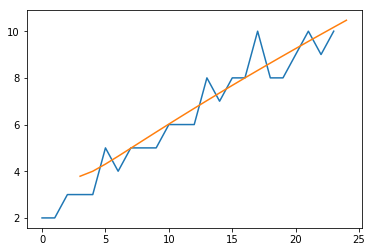

In [5]:
figure=plt.figure()
plt.plot(mx1)
plt.plot(range(3,iterations),[2*x/np.log2(x) for x in range(3,iterations)])

In [6]:
def power_of_two_choices(balls,bins,disp=False):
    A=np.zeros(bins)
    for j in range(balls):
        idx=np.random.randint(0,bins,size=2)
        if A[idx[0]]<A[idx[1]]:
            A[idx[0]]+=1
        else:
            A[idx[1]]+=1
    if disp: print(A)
    return np.max(A)

You may test power_of_two_choices for $n=100$

In [7]:
print('\nThe maximum load is :  ' ,power_of_two_choices(100,100,True))

[0. 1. 1. 1. 2. 0. 2. 1. 1. 1. 1. 0. 1. 1. 0. 1. 2. 3. 2. 0. 2. 0. 2. 2.
 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 2. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 2. 0. 1. 2. 0. 0. 1. 1. 0. 1. 0. 1.
 2. 1. 2. 1. 1. 1. 2. 0. 1. 1. 2. 2. 1. 0. 2. 0. 2. 2. 2. 1. 0. 1. 0. 0.
 1. 1. 1. 0.]

The maximum load is :   3.0


In [8]:
mx2=[]
for i in range(1,iterations):
    mx2.append(power_of_two_choices(2**i,2**i))

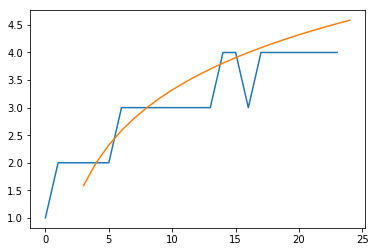

In [9]:
figure=plt.figure()
plt.plot(mx2)
plt.plot(range(3,iterations),[np.log2(x) for x in range(3,iterations)])